<a href="https://colab.research.google.com/github/KunalDM1999/Task-2-Exploratory-Data-Analysis-EDA-/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/fifa_eda[1].csv')

print(data.info())
print(data.isnull().sum().sort_values(ascending=False))
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


# **Data Explortion**

In [16]:
print(data['Name'].value_counts())
print(data['ID'].value_counts())

Name
J. Rodríguez       11
Paulinho            8
R. Williams         7
J. Williams         7
Felipe              6
                   ..
F. Aristeguieta     1
B. Paulsen          1
F. Renzetti         1
Zhang Chengdong     1
D. Texeira          1
Name: count, Length: 17194, dtype: int64
ID
246269    1
158023    1
20801     1
190871    1
193080    1
         ..
192119    1
192448    1
194765    1
202126    1
211110    1
Name: count, Length: 18207, dtype: int64


In [ ]:
print(data['Contract Valid Until'].value_counts())
print(data['Club'].value_counts())
print(data['Skill Moves'].value_counts())
print(data['International Reputation'].value_counts())

Contract Valid Until
2019-01-01    4870
2021-01-01    4360
2020-01-01    4027
2022-01-01    1477
2023-01-01    1053
2019-06-30     931
2018-01-01     886
2018-12-31     144
2019-05-31      60
2024-01-01      23
2020-06-30      14
2019-01-31      13
2025-01-01       7
2019-01-05       6
2019-01-02       6
2019-10-14       5
2019-01-12       5
2019-01-06       4
2019-01-07       3
2019-12-31       3
2019-01-25       3
2020-05-31       2
2026-01-01       2
2019-12-01       2
2018-11-30       2
2019-06-01       1
2019-01-04       1
2019-01-18       1
2019-05-04       1
2019-01-03       1
2020-02-27       1
2019-01-15       1
2019-01-30       1
2019-01-11       1
2019-01-20       1
Name: count, dtype: int64
Club
RC Celta               33
Everton                33
Valencia CF            33
Borussia Dortmund      33
TSG 1899 Hoffenheim    33
                       ..
Botafogo               20
Vitória                20
Sligo Rovers           19
Limerick FC            19
Derry City             

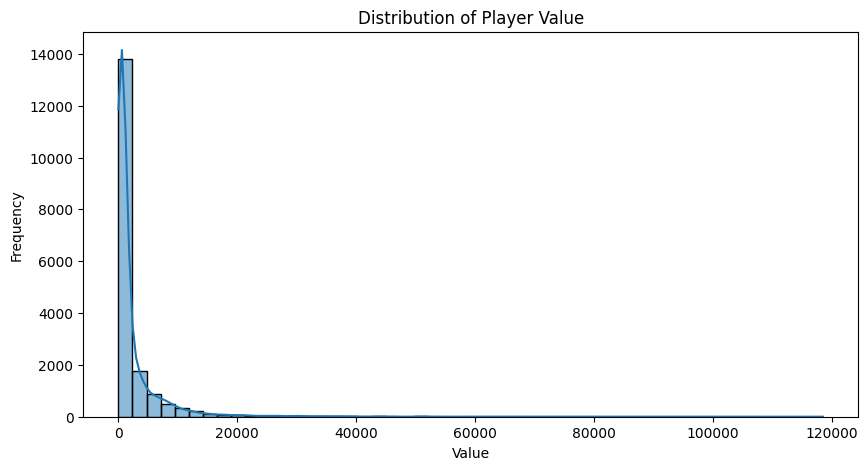

count     17955.000000
mean       2444.530214
std        5626.715434
min          10.000000
25%         325.000000
50%         700.000000
75%        2100.000000
max      118500.000000
Name: Value, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data['Value'], bins=50, kde=True)
plt.title('Distribution of Player Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Also print basic stats
print(data['Value'].describe())


# **Handling Null Values **

In [ ]:
# Extract the year and handle missing values
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'], errors='coerce')
data['Contract Valid Until Year'] = data['Contract Valid Until'].dt.year
data['Contract Valid Until Year'] = data['Contract Valid Until Year'].fillna('Unknown')
data.drop(columns=['Contract Valid Until'], inplace=True)

# Fill missing 'Club' values with 'Other'
data['Club'] = data['Club'].fillna('Other')
# Fill with mode for Skill Moves and International Reputation
data['Skill Moves'].fillna(data['Skill Moves'].mode()[0], inplace=True)
data['International Reputation'].fillna(data['International Reputation'].mode()[0], inplace=True)
#Fill with median value
data['Value'].fillna(data['Value'].median(), inplace=True)
print(data.isnull().sum().sort_values(ascending=False))


ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                        0
Wage                         0
Preferred Foot               0
International Reputation     0
Skill Moves                  0
Position                     0
Joined                       0
Height                       0
Weight                       0
Release Clause               0
Contract Valid Until Year    0
dtype: int64


<ipython-input-4-cc7566d8d3ee>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Skill Moves'].fillna(data['Skill Moves'].mode()[0], inplace=True)
<ipython-input-4-cc7566d8d3ee>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

# **Exploratory Data Analysis**


*   summary statistics   
*   histograms and boxplots for numeric features



In [ ]:
data.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2420.384468,9.731312,1.112924,2.360356,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5591.354494,21.999290,0.393554,0.755394,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2000.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


# **histograms and boxplots**

<Figure size 1500x1200 with 0 Axes>

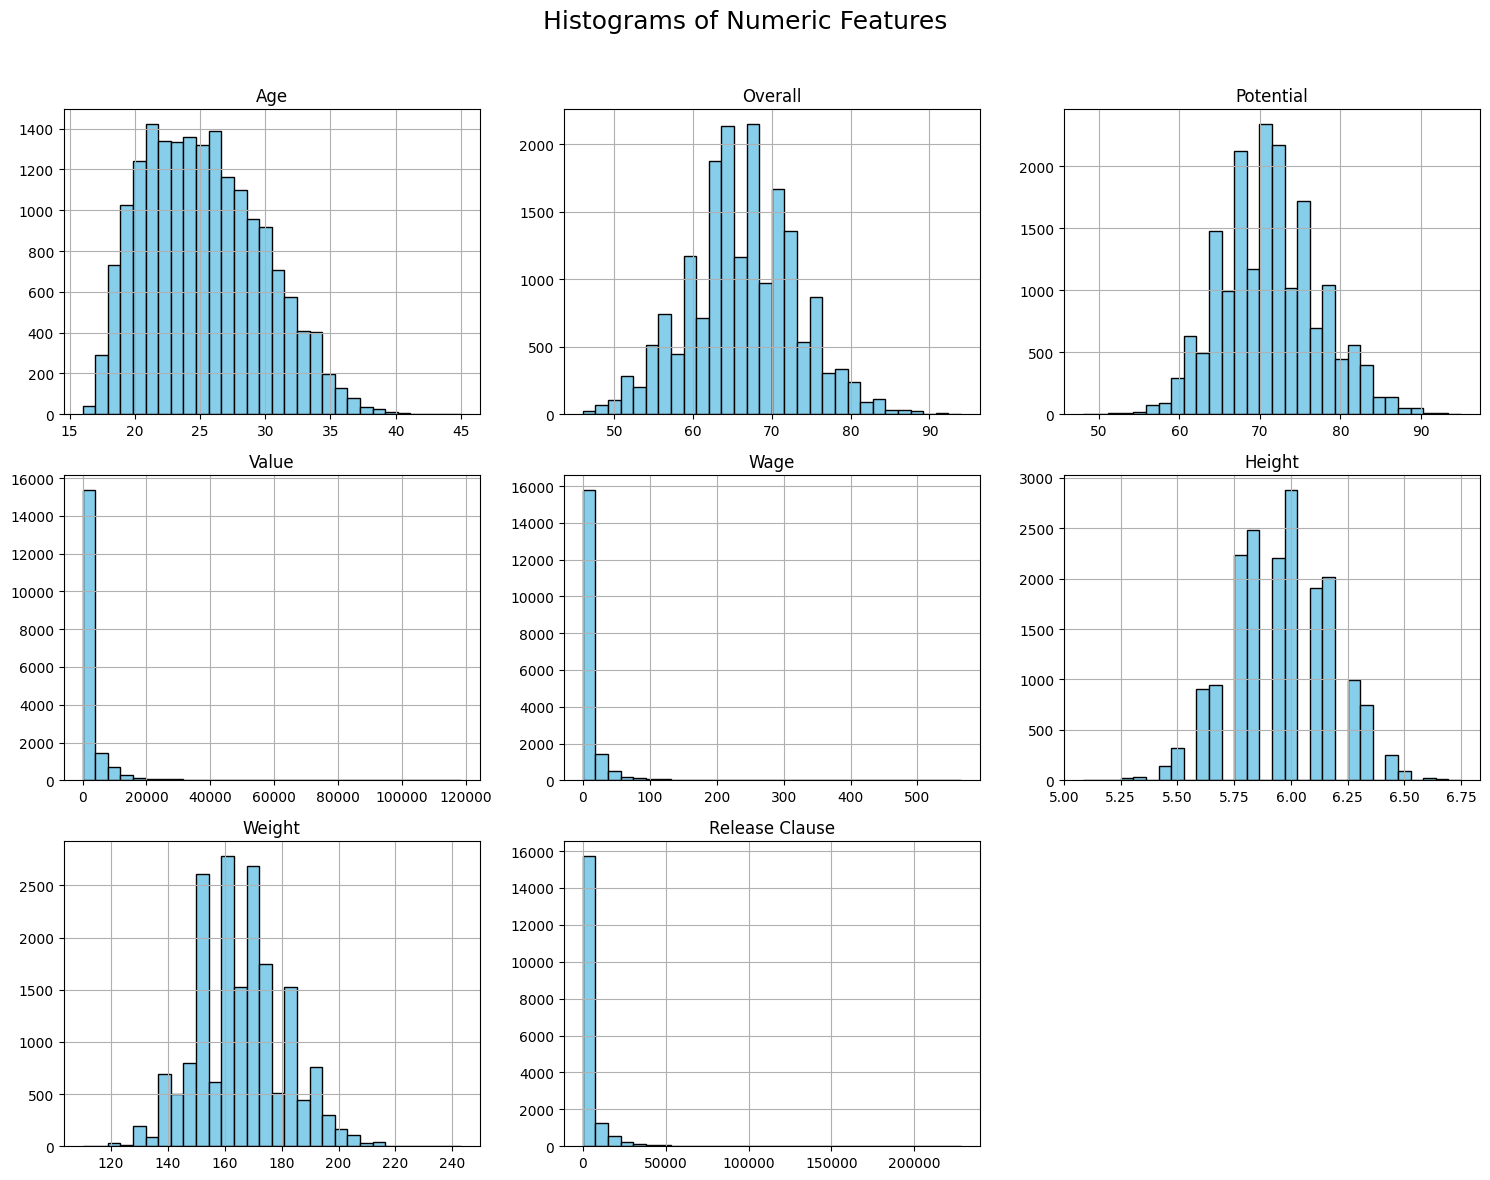

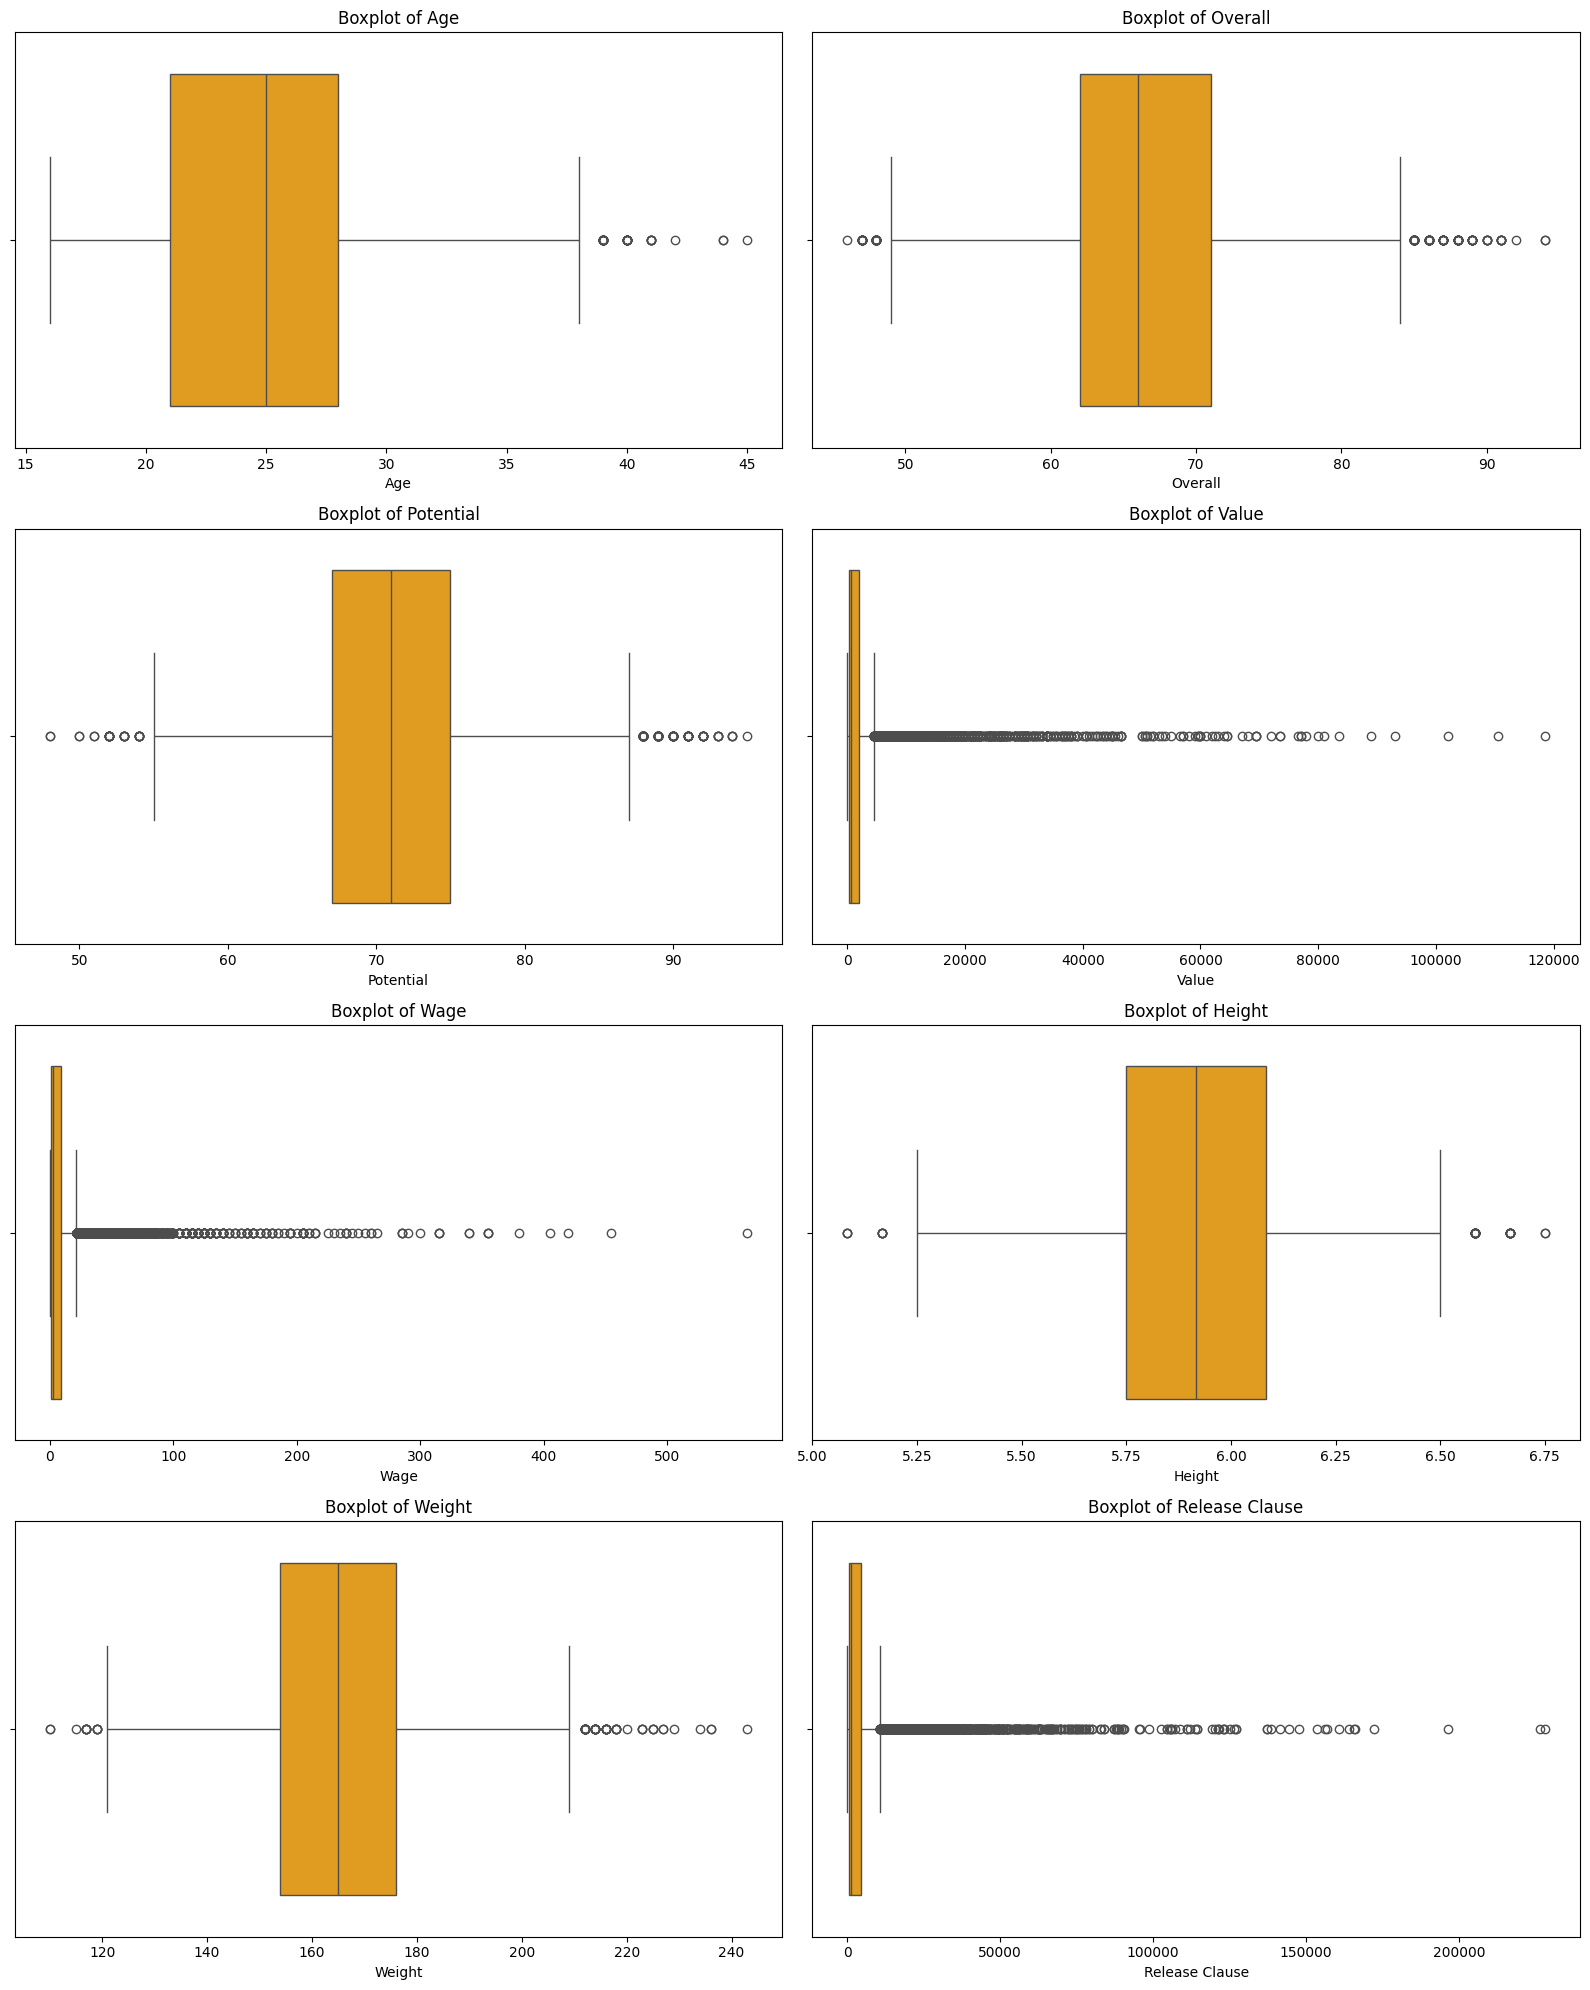

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns
numeric_columns = ['Age', 'Overall', 'Potential', 'Value', 'Wage',
                   'Height', 'Weight', 'Release Clause']

# --- Histograms ---
plt.figure(figsize=(15, 12))
data[numeric_columns].hist(bins=30, edgecolor='black', color='skyblue', layout=(3, 3), figsize=(15, 12))
plt.suptitle('Histograms of Numeric Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Boxplots ---
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()
plt.show()

# **Inportent Key Inferences **  

*  Age, Overall, Potential, Height, and Weight look normally distributed
= These are stable and balanced, so we can use them directly or apply standard scaling if needed.

* Value, Wage, and Release Clause are highly skewed
= These need transformation (like log scale) to reduce the effect of very high values.

* Outliers mostly appear in financial columns
=  We should be careful while using them in models that are sensitive to outliers (like Linear Regression). List item

* Some features (like financial ones) vary a lot
= These features may dominate models — we may consider scaling or treating them carefully



# **pairplot And correlation matrix**

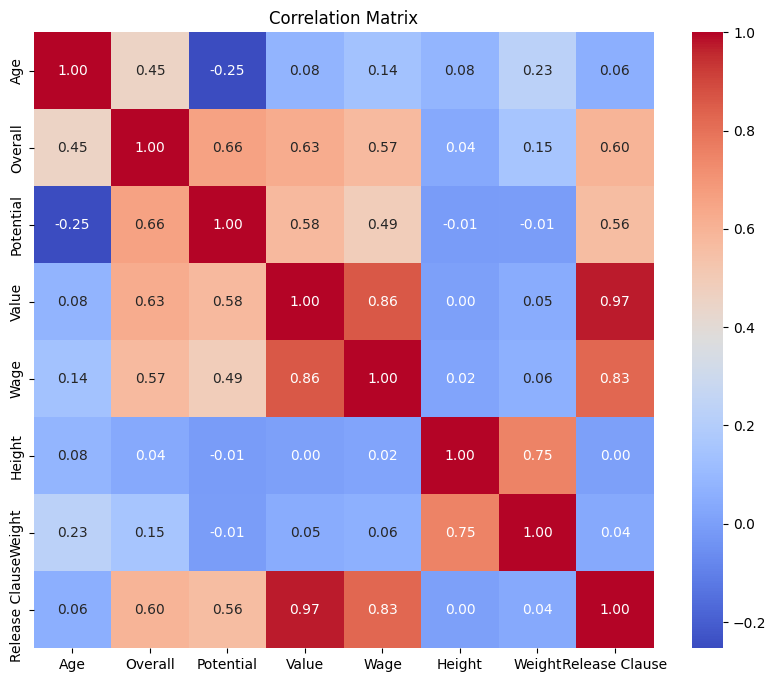

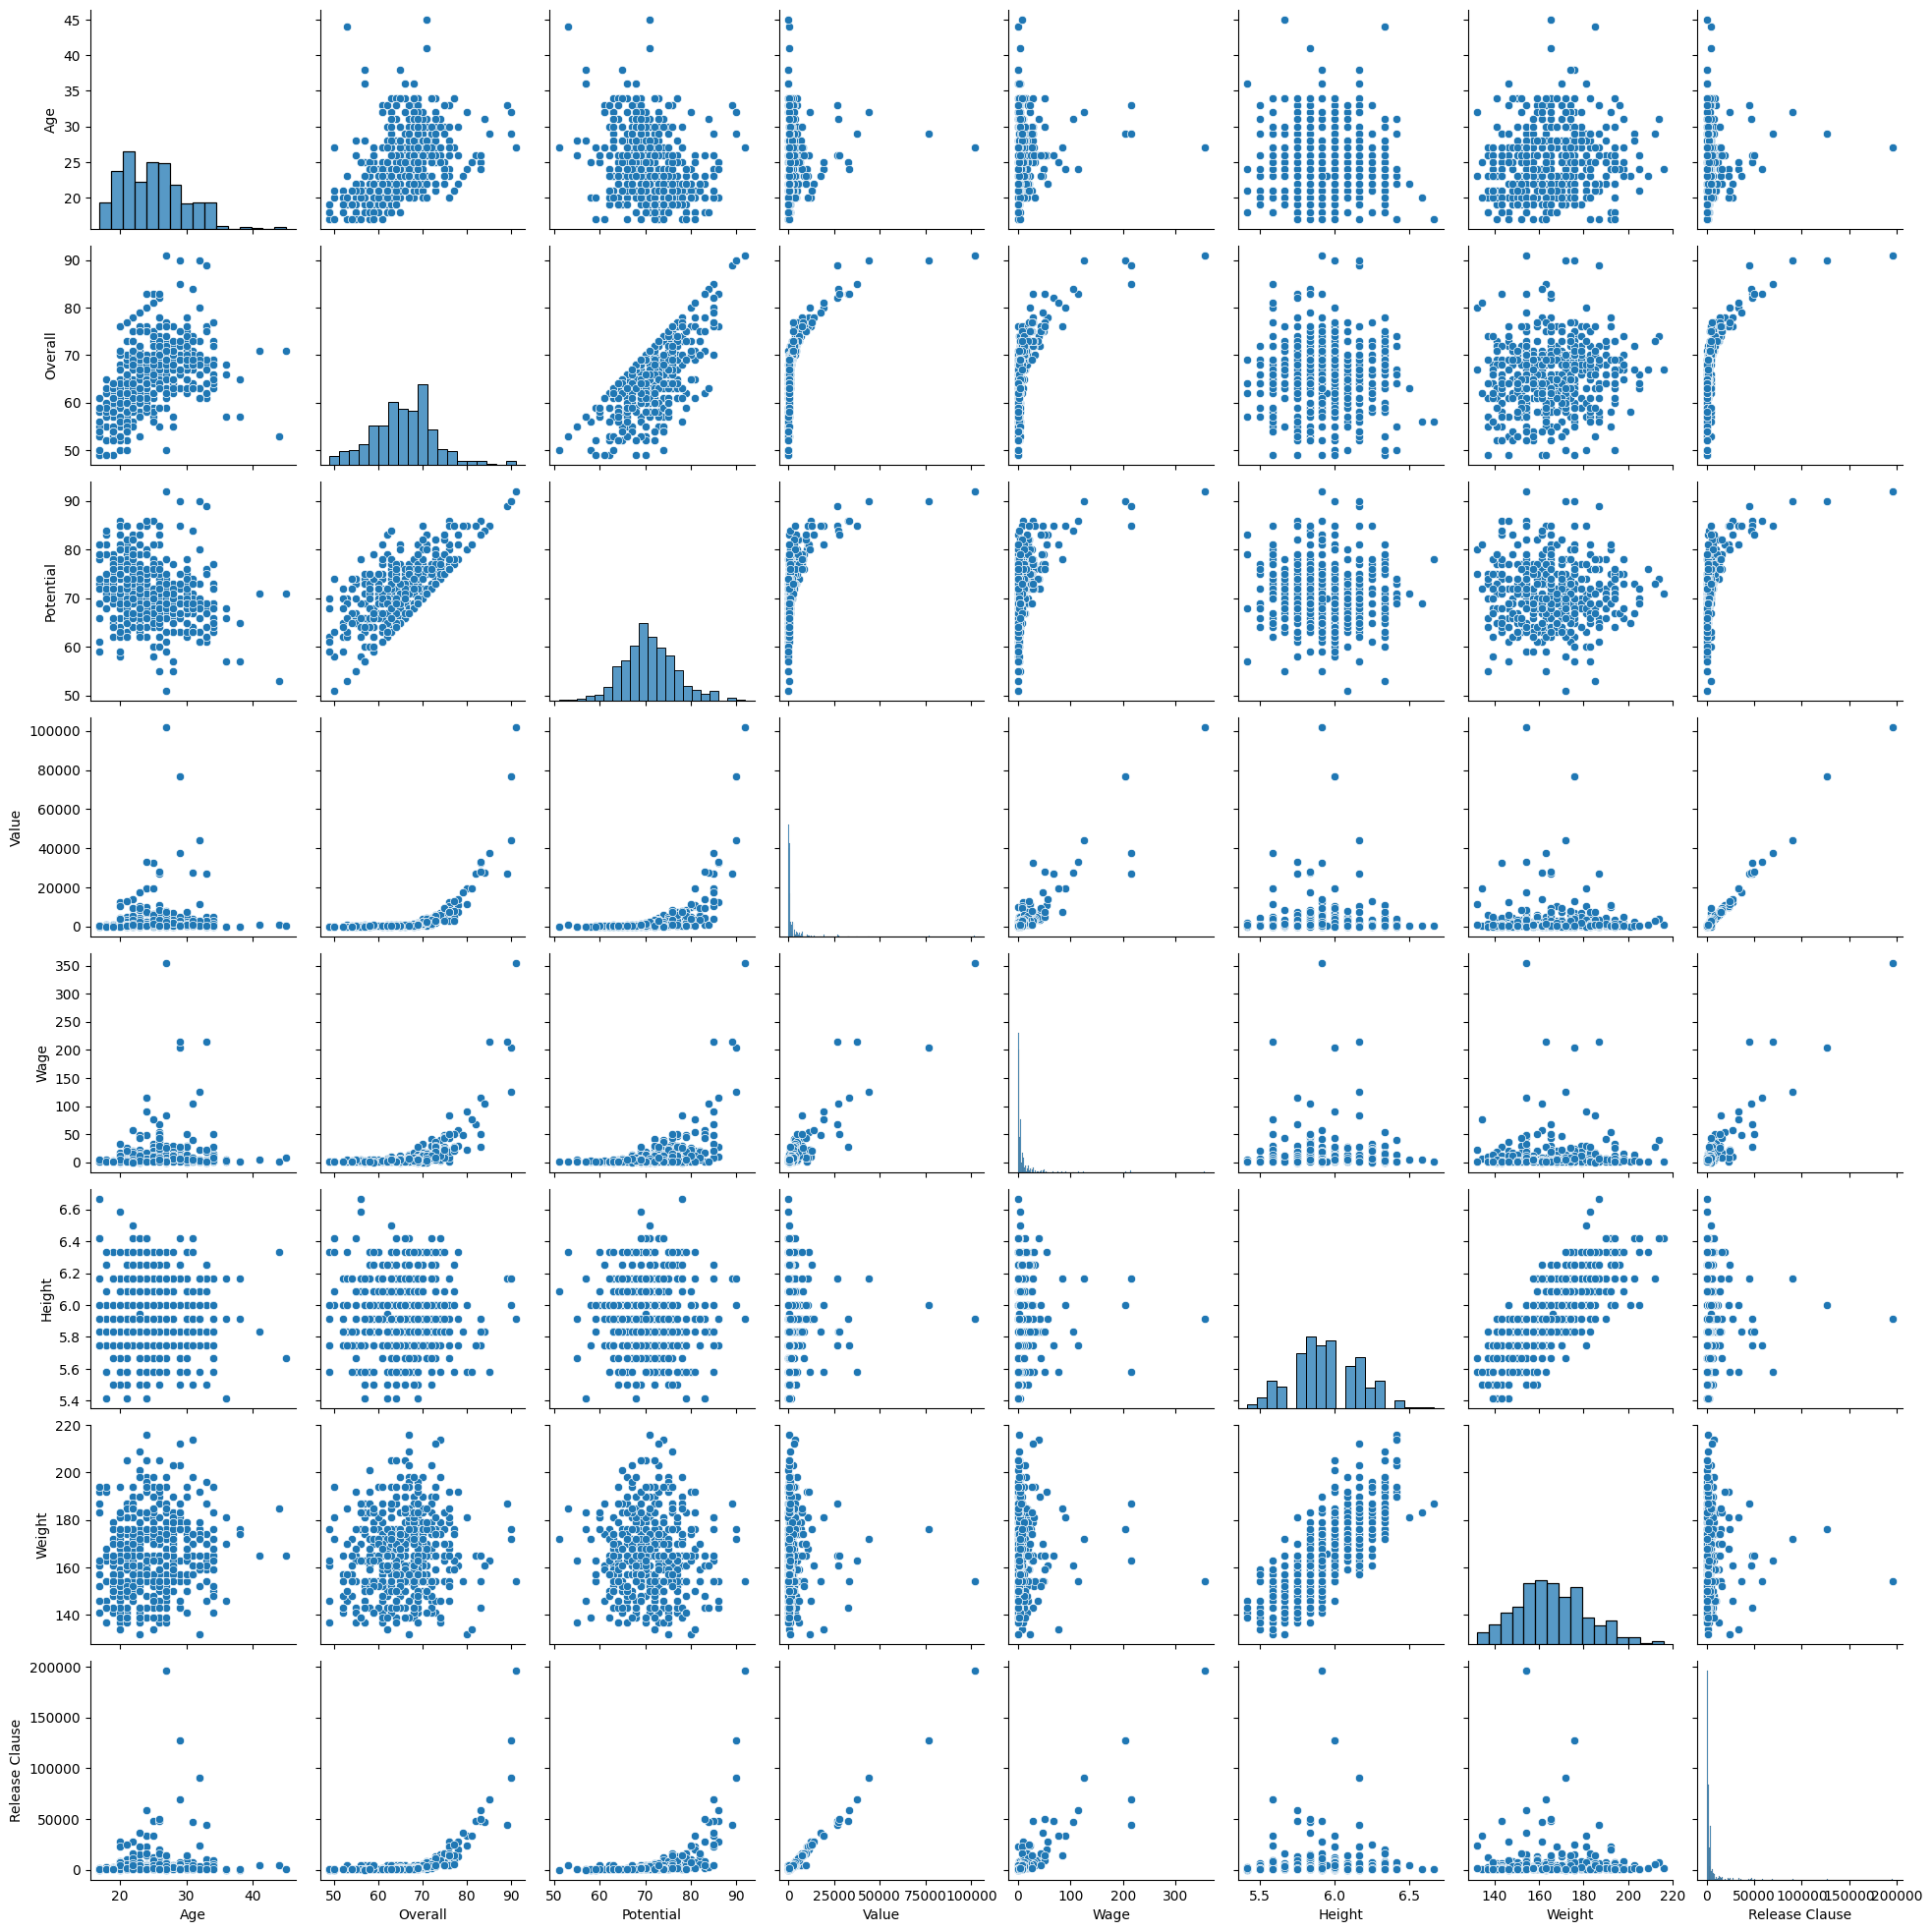

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'Release Clause']
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(data[numeric_cols].sample(500))


# **Inportent Key Inferences of pairplot & correlation matrix**  

* Value, Wage, and Release Clause are strongly linked — they increase or decrease
together, so we might not need all three in the model (to avoid repeating the same info).

* Some variables (like Value and Release Clause) show a clear straight-line pattern — good for prediction, but others (like Wage) have many extreme values, so we might use log scale to handle them better.

* Curved or scattered plots suggest non-linear relationships — tree-based models (like Random Forest or XGBoost) may capture these patterns better than linear models.

* Height and Weight are naturally related — we might combine them into a new feature like BMI, but they won’t cause issues if kept as is.

* Most other features look normal without big issues — no strong outliers or strong overlaps, so we can safely include them in model training.

# **Patterns, trends, or anomalies in the data.**

<ipython-input-12-51fdddf43788>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
<ipython-input-12-51fdddf43788>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
<ipython-input-12-51fdddf43788>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
<ipython-input-12-51fdddf43788>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

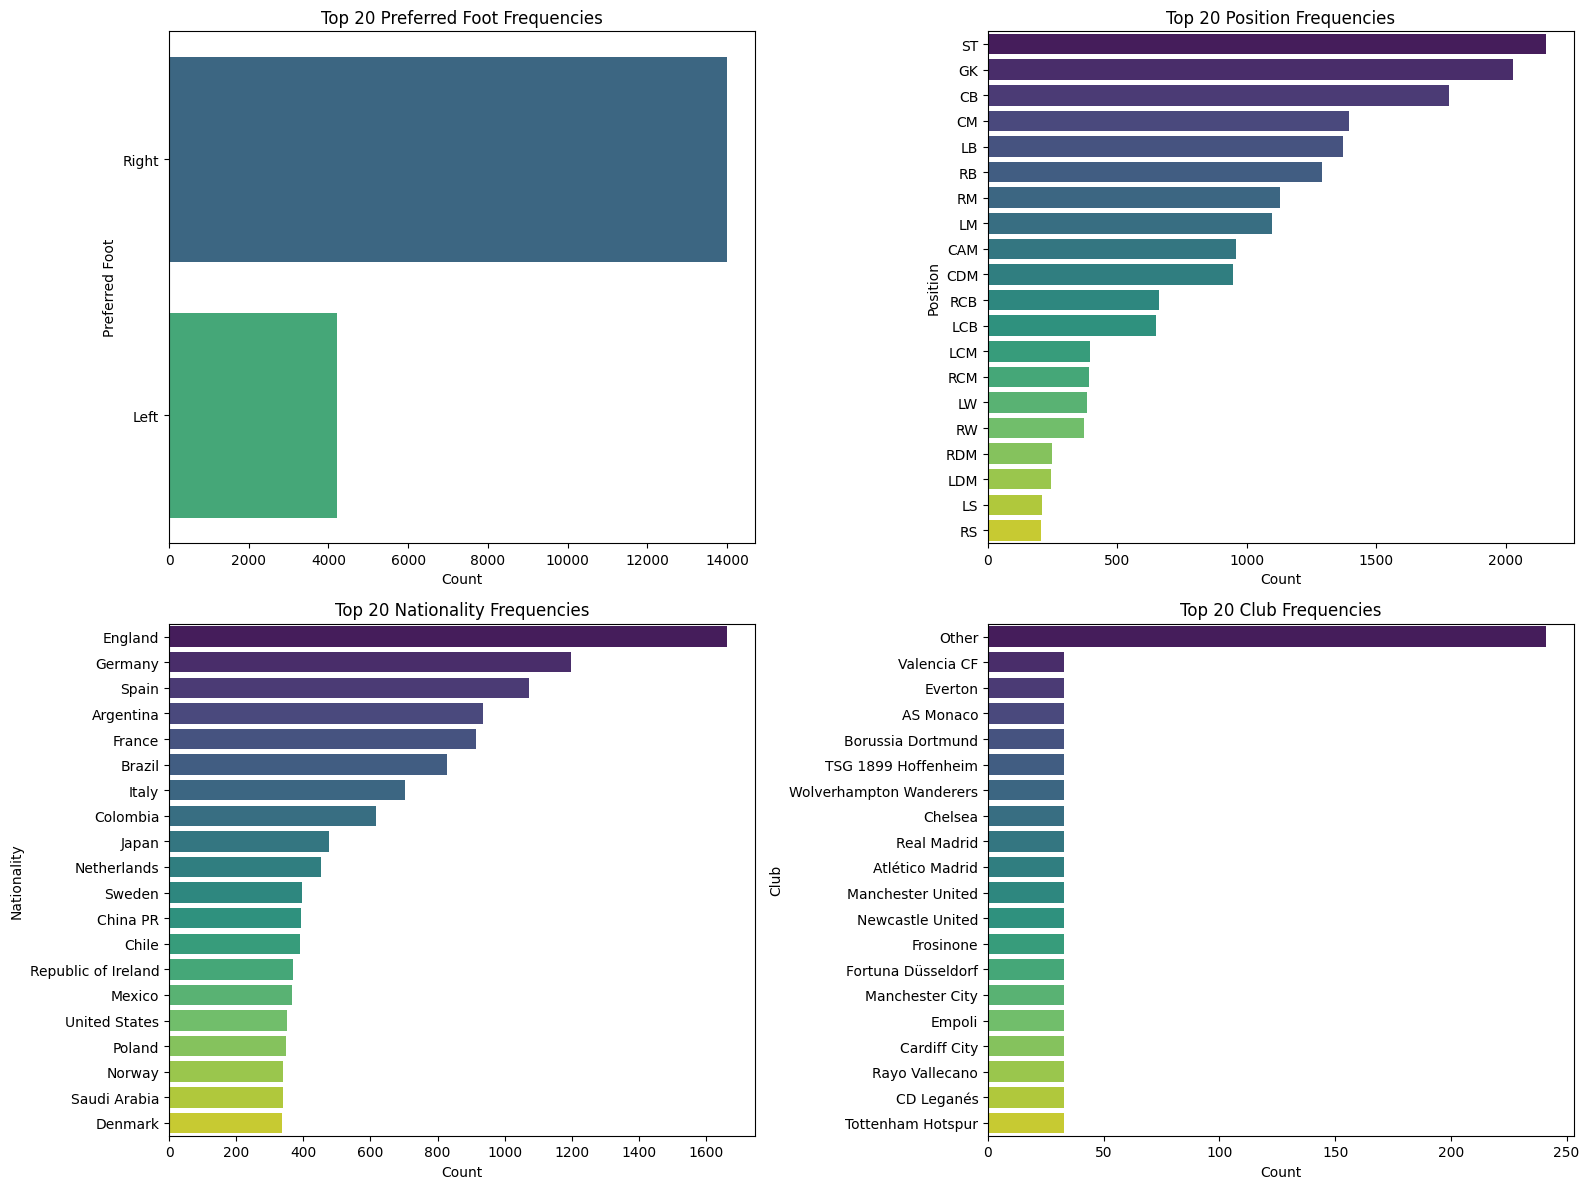

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['Preferred Foot', 'Position', 'Nationality', 'Club']
top_n = 20

plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    top_values = data[col].value_counts().nlargest(top_n)
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
    plt.title(f'Top {top_n} {col} Frequencies')
    plt.xlabel('Count')
plt.tight_layout()
plt.show()



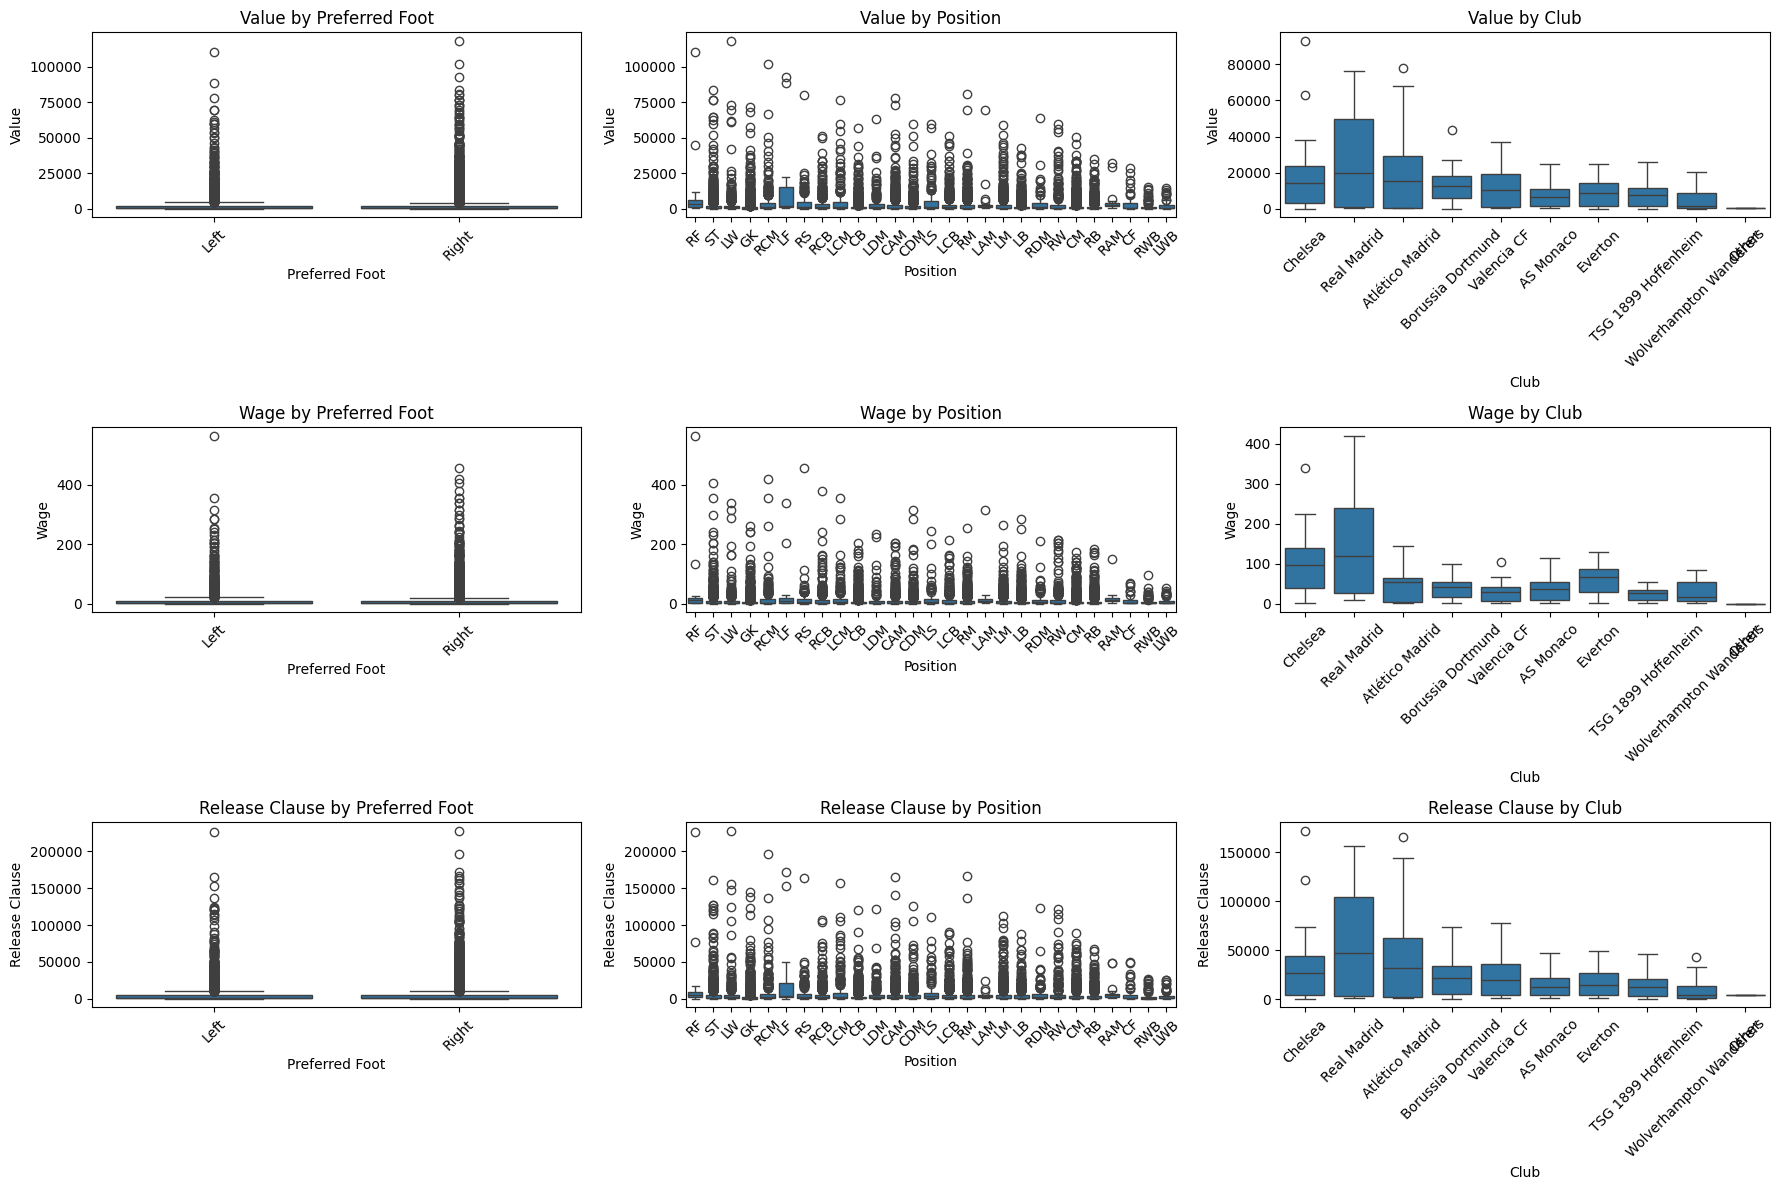

In [13]:
def top_k(df, col, k=10):
    top = df[col].value_counts().nlargest(k).index
    return df[df[col].isin(top)]

num_features = ['Value', 'Wage', 'Release Clause']
cat_features = ['Preferred Foot', 'Position', 'Club']

plt.figure(figsize=(18, 12))
plot_num = 1
for num in num_features:
    for cat in cat_features:
        if cat == 'Club':
            plot_data = top_k(data, cat, 10)
        else:
            plot_data = data
        plt.subplot(3, 3, plot_num)
        sns.boxplot(x=cat, y=num, data=plot_data)
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plot_num += 1
plt.tight_layout()
plt.show()


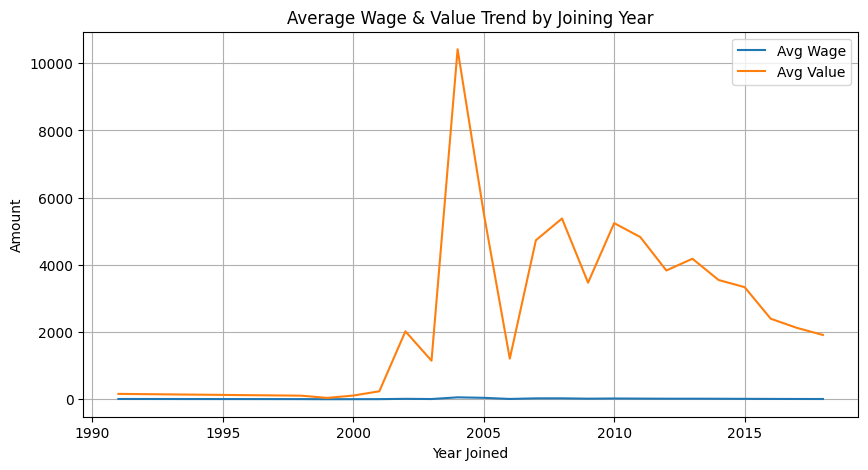

In [14]:
yearly_avg = data.groupby('Joined')[['Wage', 'Value']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Joined', y='Wage', data=yearly_avg, label='Avg Wage')
sns.lineplot(x='Joined', y='Value', data=yearly_avg, label='Avg Value')
plt.title('Average Wage & Value Trend by Joining Year')
plt.ylabel('Amount')
plt.xlabel('Year Joined')
plt.legend()
plt.grid(True)
plt.show()


# **Inportent Key Inferences of other plots**
* Preferred Foot – Most players are right-footed = use binary encoding.

* Position – Some positions (ST, GK, CB) are very common = use frequency encoding.

* Nationality – Big difference in player counts (e.g., England vs others) = use frequency encoding.

* Club – "Other" (from nulls) has the most players = keep "Other", and use frequency or label encoding for the rest.

* Outliers – Value, Wage, and Release Clause have big outliers across categories = consider log transform or scaling.

# **Preprocessing – Design Decisions:**
* Remove ID and Name – They don’t help in modeling because they are too unique and inconsistent.

* Handle Categorical Features:

Use binary encoding for 'Preferred Foot' (right/left).

Use frequency encoding for 'Position', 'Nationality', and 'Club' to reduce high cardinality.

* Handle Skewed Columns – Apply log transformation on 'Value', 'Wage', and 'Release Clause' to reduce skewness.

* Normalize Data – Apply standard scaling to numeric features to bring them on the same scale.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Drop ID and Name
data.drop(['ID', 'Name'], axis=1, inplace=True)

# Encoding: Binary Encoding for Preferred Foot
data['Preferred Foot'] = data['Preferred Foot'].map({'Right': 1, 'Left': 0})

# Encoding: Frequency Encoding for Position, Nationality, Club
for col in ['Position', 'Nationality', 'Club']:
    freq_encoding = data[col].value_counts().to_dict()
    data[col] = data[col].map(freq_encoding)

# Log transformation for skewed features
for col in ['Value', 'Wage', 'Release Clause']:
    data[col] = np.log1p(data[col])

# Standardization for normal features
normal_features = ['Age', 'Overall', 'Potential', 'Height', 'Weight']
skewed_features = ['Value', 'Wage', 'Release Clause']

scaler = StandardScaler()
data[normal_features + skewed_features] = scaler.fit_transform(data[normal_features + skewed_features])

data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Contract Valid Until Year
0,1.258678,937,4.018287,3.698092,33,3.516249,4.570998,0,5.0,4.0,16,2004,-1.648184,-0.448174,3.502621,2021.0
1,1.686961,322,4.018287,3.698092,25,3.257026,4.245104,1,5.0,5.0,2154,2018,0.997223,1.093019,3.095622,2022.0
2,0.187972,827,3.728799,3.535128,30,3.566412,3.918436,1,5.0,5.0,381,2017,-0.892354,-1.026122,3.507579,2022.0
3,0.402113,1072,3.584055,3.535128,33,3.208843,3.811711,1,4.0,1.0,2027,2011,1.753053,0.129773,3.156638,2020.0
4,0.402113,260,3.584055,3.372164,33,3.458806,4.116192,1,4.0,4.0,391,2015,-0.136523,-0.769256,3.402175,2023.0


Modeling Design Decisions (Based on Our Data)
* Tree-based models (e.g., XGBoost, Random Forest)
 Best suited due to skewed variables, outliers, and encoded categorical features.

* Avoid distance-based models like KNN/SVM
Our data has many outliers and high-cardinality categories; these models may struggle.

* Use linear models (like Linear Regression or Ridge) only for baseline
 Some linear relationships exist (e.g., between Value & Release Clause), but not enough for full reliance.

* Try feature importance methods
Helps drop less useful features like rare positions or clubs.

* Use evaluation metrics that handle skew
1. For regression: MAE or RMSE (since wage/value vary a lot).
2. For classification (if done): Use F1-score due to potential imbalance.